In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Country.csv')

raw_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Q1. Check for missing values , duplicate values and correlation ? And resolve them accordingly

### Missing Values

In [3]:
raw_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**There are no missing values in dataset**

### Duplicate Values

In [4]:
# Check if there is replication in the data
raw_data.duplicated().any()

False

**No duplicate entries**

### Correlation

In [5]:
data_num=raw_data.drop(["country"], axis=1)
corr = data_num.corr()
corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


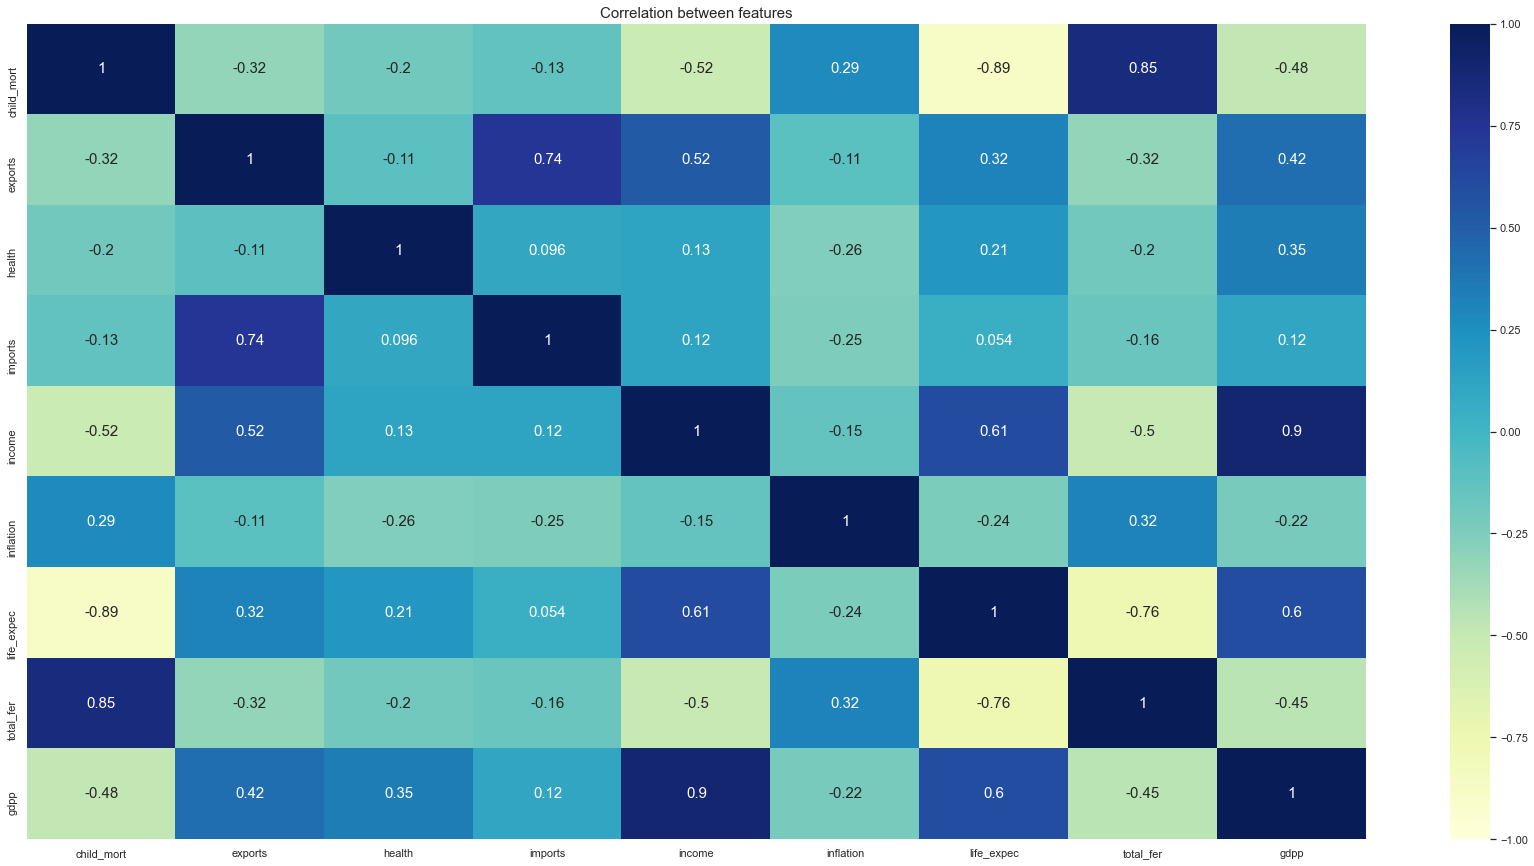

In [6]:

# set the figure size
plt.figure(figsize=(30, 15))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# set condition to get a strong correlation between the variables
sns.heatmap(corr, 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

# set the title
# fontsize=30: set the font size of the title
plt.title('Correlation between features', fontsize=15)
# display the plot
plt.show()

**From the correlation map we see that**

1. child_mort has a strong inverse correlation with income(net income per person), life_expect(expected years of living) and gdpp(the GDP per capita), a moderate correlation with inflation(annual growth rate of the total GDP) and total_fert(fertility rate).
2. income is correlated with exports and gdpp.
3. exports is correlated with imports
4. life_expec is correlated with income and gdpp, inversly correlated with total_fert

The variables can be didived into economic metrics(exports, imports, income, inflation, gdpp, health), health metrics(child_mort, life_expec, total_fer).

### Q2. Which countries should be provided with the aid ?

The variables can be didived into economic metrics(exports, imports, income, inflation, gdpp, health), health metrics(child_mort, life_expec, total_fer).

In [7]:
# separate country column and the rest variables
raw_data.index=raw_data.iloc[:,0]

In [8]:
data_1 = raw_data.copy()

In [10]:
from sklearn.cluster import KMeans

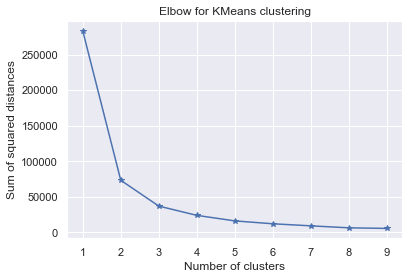

In [11]:
# clustering the samples based on health factors(child_mort, life_expec, total_fer)
data_clustering_1=raw_data[['child_mort', 'life_expec', 'total_fer']]

# plot sum of squared distances (elbow method)
K = range(1,10)
data_km = [KMeans(n_clusters=k).fit(data_clustering_1) for k in K]
ssd = [data_km[k].inertia_ for k in range(len(data_km))]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, ssd, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow for KMeans clustering')
plt.show()

**Considering k = 3**

In [12]:
kmeans = KMeans(n_clusters=3)
model = kmeans.fit(data_clustering_1)
pred = model.labels_
data_1['cluster_km'] = pred
data_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km
country,,,,,,,,,,,
Afghanistan,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
Albania,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


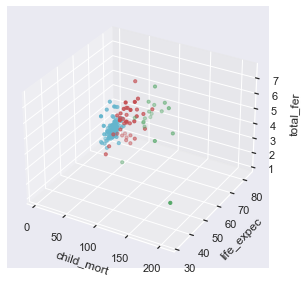

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cluster_0 = data_1.query('cluster_km==0')
cluster_1 = data_1.query('cluster_km==1')
cluster_2 = data_1.query('cluster_km==2')
plt_0 = ax.scatter(cluster_0['child_mort'], cluster_0['life_expec'], cluster_0['total_fer'], c='c', s=10)
plt_1 = ax.scatter(cluster_1['child_mort'], cluster_1['life_expec'], cluster_1['total_fer'], c='r', s=10)
plt_2 = ax.scatter(cluster_2['child_mort'], cluster_2['life_expec'], cluster_2['total_fer'], c='g', s=10)
ax.set_xlabel('child_mort')
ax.set_ylabel('life_expec')
ax.set_zlabel('total_fer')
plt.tight_layout()
plt.show()

We can see from the plot that cluster 2 are high child_mort, high total_fer and low life_expec, indicating poor social health, so we want to further cluster these data points based on their economic conditions.

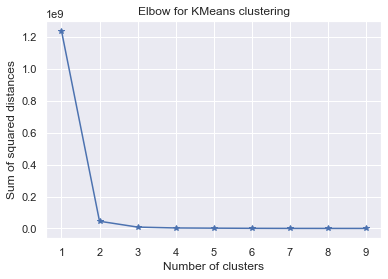

In [14]:
# clustering the samples based on economic factors(child_mort, life_expec, total_fer)
data_clustering_2=cluster_2[['income', 'gdpp', 'health']]

# plot sum of squared distances (elbow method)
K = range(1,10)
data_km = [KMeans(n_clusters=k).fit(data_clustering_2) for k in K]
ssd = [data_km[k].inertia_ for k in range(len(data_km))]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, ssd, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow for KMeans clustering')
plt.show()


In [15]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(data_clustering_2)

In [16]:
pred = model.labels_
cluster_2['cluster_km'] = pred
cluster_2.head()

/home/coder/Desktop/VirtualEnv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km
country,,,,,,,,,,,
Angola,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
Benin,Benin,111.0,23.8,4.10,37.2,1820,0.885,61.8,5.36,758,0
Burkina Faso,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0
Cameroon,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0
Central African Republic,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,0


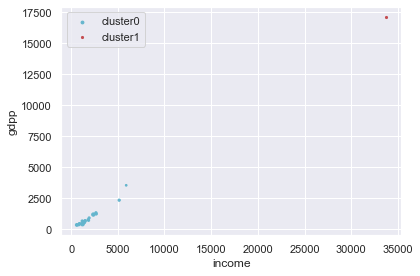

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
cluster_2_0 = cluster_2.query('cluster_km==0')
cluster_2_1 = cluster_2.query('cluster_km==1')
cluster_2_2 = cluster_2.query('cluster_km==2')
plt_0 = ax.scatter(cluster_2_0['income'], cluster_2_0['gdpp'], cluster_2_0['health'], c='c',  label='cluster0')
plt_1 = ax.scatter(cluster_2_1['income'], cluster_2_1['gdpp'], cluster_2_1['health'], c='r', label='cluster1')
ax.set_xlabel('income')
ax.set_ylabel('gdpp')
#ax.set_zlabel('health')
ax.legend()
plt.tight_layout()
plt.show()

From the plot we see that cluster 0 of the second k-means contains countries with low income and low gdpp. The health expenses vary.

In [18]:
# sort cluster0 by gdpp, income, health ascendingly
cluster_2_0.sort_values(['income','gdpp','health'],ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_km
country,,,,,,,,,,,
"Congo, Dem. Rep.","Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,0
Niger,Niger,123.0,22.2,5.16,49.1,814,2.550,58.8,7.49,348,0
Central African Republic,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,0
Mozambique,Mozambique,101.0,31.5,5.21,46.2,918,7.640,54.5,5.56,419,0
Guinea,Guinea,109.0,30.3,4.93,43.2,1190,16.100,58.0,5.34,648,0
Sierra Leone,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399,0
Guinea-Bissau,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.970,55.6,5.05,547,0
Burkina Faso,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.810,57.9,5.87,575,0
Haiti,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662,0


**Ans : Results suggest that the aid should be provided to the countries at the top of the list(Congo, Niger, Central African Republic, etc.).**

### Q3. Remove the curse of dimensionality?

In [19]:
x = raw_data.drop('country',axis = 1)


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)

MinMaxScaler()

In [21]:
X = scaler.fit_transform(x)

In [22]:
from sklearn.decomposition import PCA


**Finding number of principal componets that explain 95% variance**

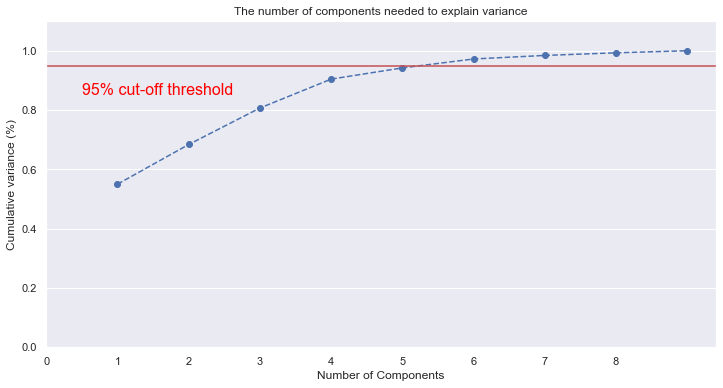

In [23]:
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 10, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 9, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()


**95% Variance is explained at number of principal components = 5**

In [24]:
pca = PCA(n_components=5, random_state=42)  

# fit_transform() computes the principal components 
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(X)

In [25]:
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC' + str(i) for i in range(1,6)])

# head() to display top five rows
PCA_df.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799


### Q4. Build a Kmeans model by selecting optimal number of clusters using elbow method ?

In [26]:
df_Kmeans = PCA_df.copy()


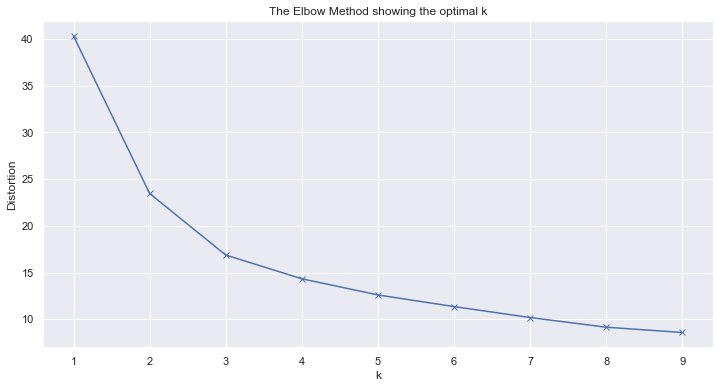

In [27]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(PrincipalComponents)
    #distortions.append(sum(np.min(cdist(PrincipalComponents, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / PrincipalComponents.shape[0])
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

By using Elbow method we found k = 3 as optimal number of clusters

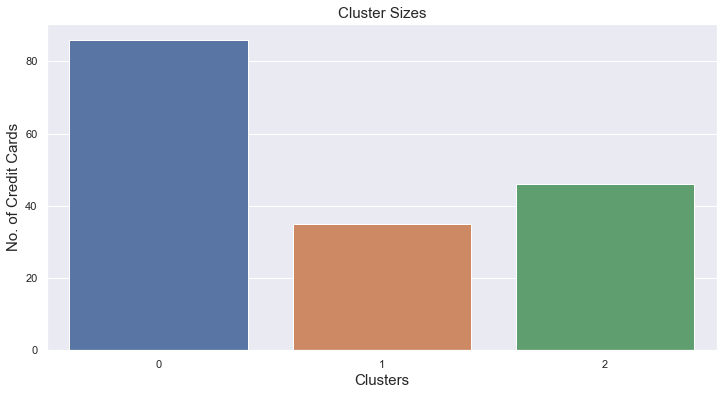

In [28]:

Kmodel = KMeans(n_clusters= 3, random_state= 10)

Kmodel.fit(PrincipalComponents)
KMeans(n_clusters=3, random_state=10)
df_Kmeans['Cluster'] = Kmodel.fit_predict(PrincipalComponents)
sns.countplot(data= df_Kmeans, x = 'Cluster')


plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Credit Cards', fontsize = 15)

plt.show()

### Q5. Find optimal number of clusters using silhouette test ?

In [29]:
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [2,3,4, 5,6,7,8]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(PrincipalComponents)
    
    score = silhouette_score(PrincipalComponents, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.39864070438831833)
For n_clusters = 3, silhouette score is 0.3682498878074277)
For n_clusters = 4, silhouette score is 0.37618574330465154)
For n_clusters = 5, silhouette score is 0.2848664419822987)
For n_clusters = 6, silhouette score is 0.2868456982026874)
For n_clusters = 7, silhouette score is 0.25670836619220605)
For n_clusters = 8, silhouette score is 0.2718884265198192)


**The silhouette score is high when number of clusters are 2**

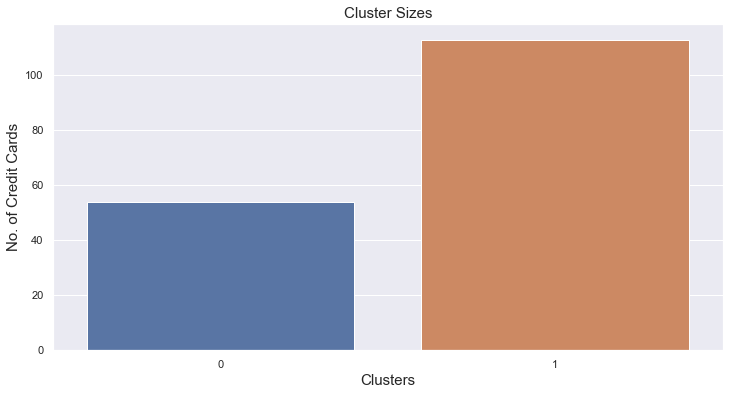

In [30]:
Kmodel = KMeans(n_clusters= 2, random_state= 10)

Kmodel.fit(PrincipalComponents)
KMeans(n_clusters=2, random_state=10)
df_Kmeans['Cluster'] = Kmodel.fit_predict(PrincipalComponents)
sns.countplot(data= df_Kmeans, x = 'Cluster')


plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 15)
plt.ylabel('No. of Credit Cards', fontsize = 15)

plt.show()